# iDigBio Maps

## How to Create a Heatmap and Regular Map Using iDigBio's API

In this tutorial, we'll create a simple heatmap and some other maps using the iDigBio API. This will give you the skills necessary to navigate the API for making maps. Heatmaps are just one of the types of maps we can make. 

First, import:

In [1]:
import idigbio
import pandas as pd
from IPython.display import Image

I've copied this text from my last tutorial: 
### Step 4: Accessing the Actual Data

At this point, we can search for whatever information we need. Here are the basics:

Create json data
`api = idigbio.json()
json_output = api.search_records()`

or 

Create a pandas dataframe
`api = idigbio.pandas()
pandas_output = api.search_records()`

[This website](https://github.com/idigbio/idigbio-search-api/wiki) is useful in using this system. 

Here, we will use json.

In [2]:
api_json = idigbio.json() #I modified this line to specify which data type we're using
json_output = api_json.search_records()
json_output

{'itemCount': 115173471,
 'lastModified': '2018-10-13T15:13:05.710Z',
 'items': [{'uuid': '061594f4-69a3-41ff-9396-dac55cc8409b',
   'type': 'records',
   'etag': '1ec2d44f898f84f67517c85417ef0269222c4cf1',
   'data': {},
   'indexTerms': {'startdayofyear': 281,
    'country': 'united states',
    'earliestepochorlowestseries': 'eocene',
    'institutionid': 'http://biocol.org/urn:lsid:biocol.org:col:34878',
    'collectioncode': 'invertebrate paleontology',
    'dqs': 0.5797101449275363,
    'countrycode': 'usa',
    'datecollected': '1967-10-08',
    'county': 'lewis',
    'lowestbiostratigraphiczone': 'narizian',
    'hasMedia': False,
    'uuid': '061594f4-69a3-41ff-9396-dac55cc8409b',
    'basisofrecord': 'fossilspecimen',
    'taxonrank': 'species',
    'order': 'neogastropoda',
    'individualcount': 3,
    'highertaxon': 'mollusca; gastropoda; neogastropoda; buccinidae',
    'locality': '[redacted]',
    'occurrenceid': 'urn:catalog:uwbm:invertebratepaleontology:66079',
    'st

Now that we have the data, let's make some maps. 

Here, I want to see all the bears in the collections. 

My home institution is UC Berkeley, where our mascot is Oski who is a Golden Bear. Although there are no bears in California anymore, I would like to know more about bears in general. Let's make a heatmap of bears around the world. 

What is a bear? A bear is a large mammal of the genus Ursus. Here are some pictures of bears. 

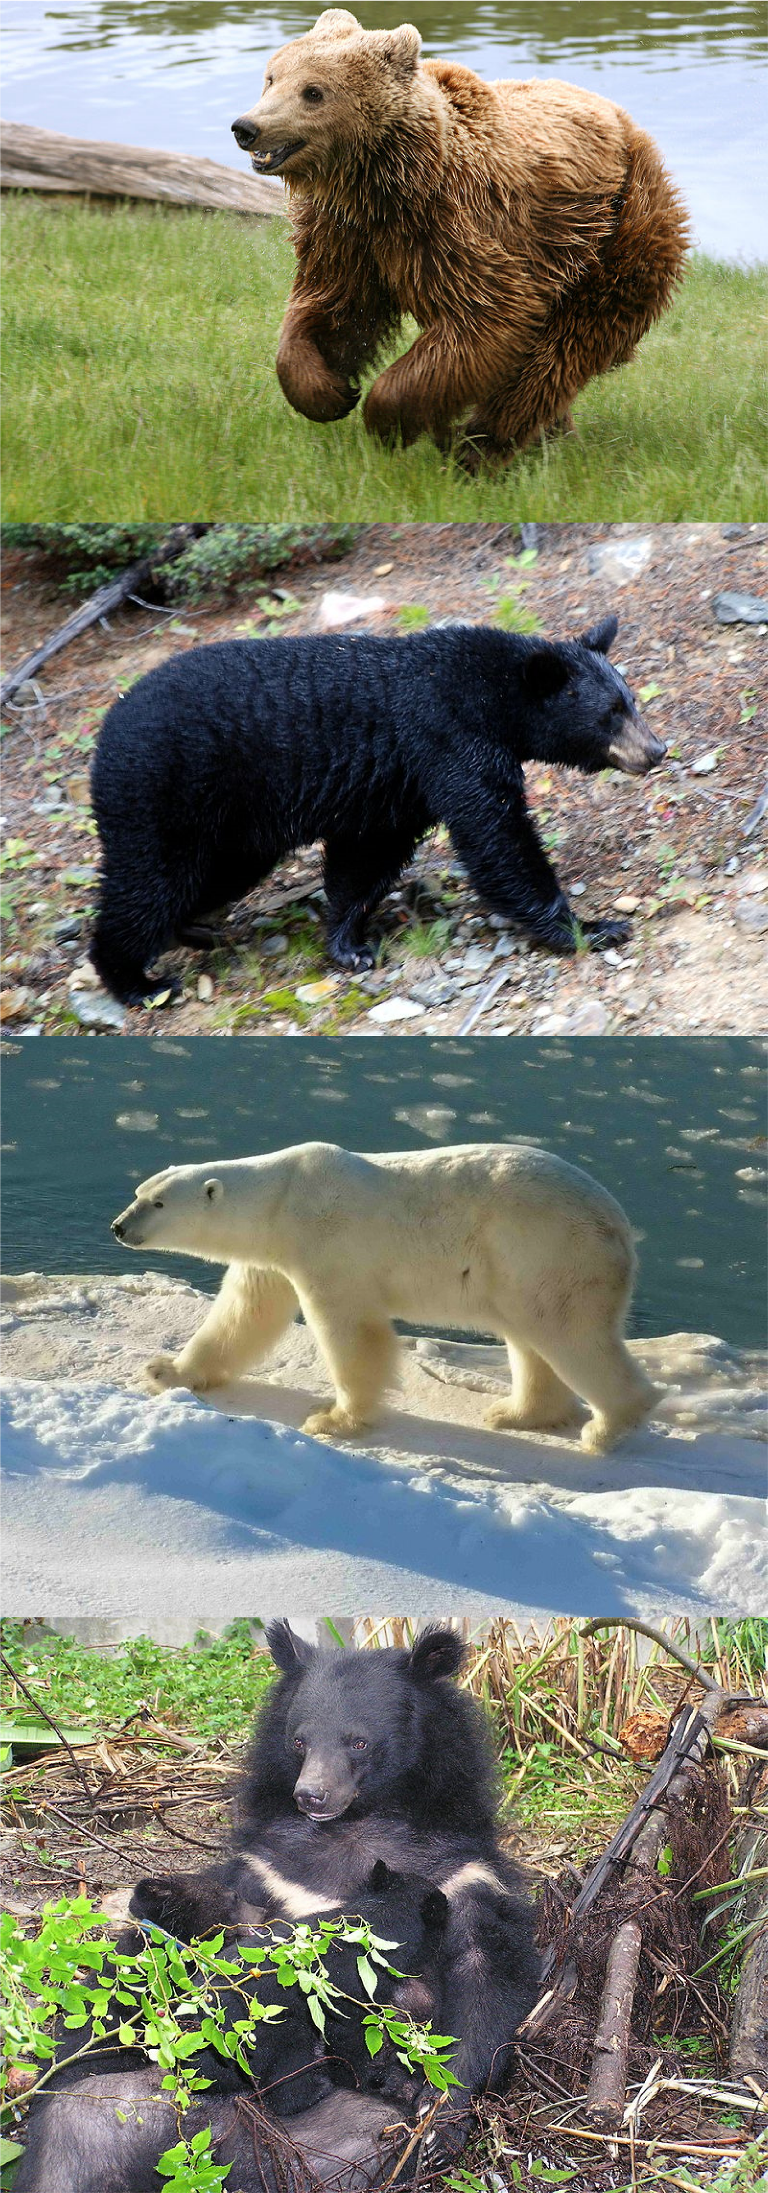

In [11]:
Image(filename = 'bears.png')

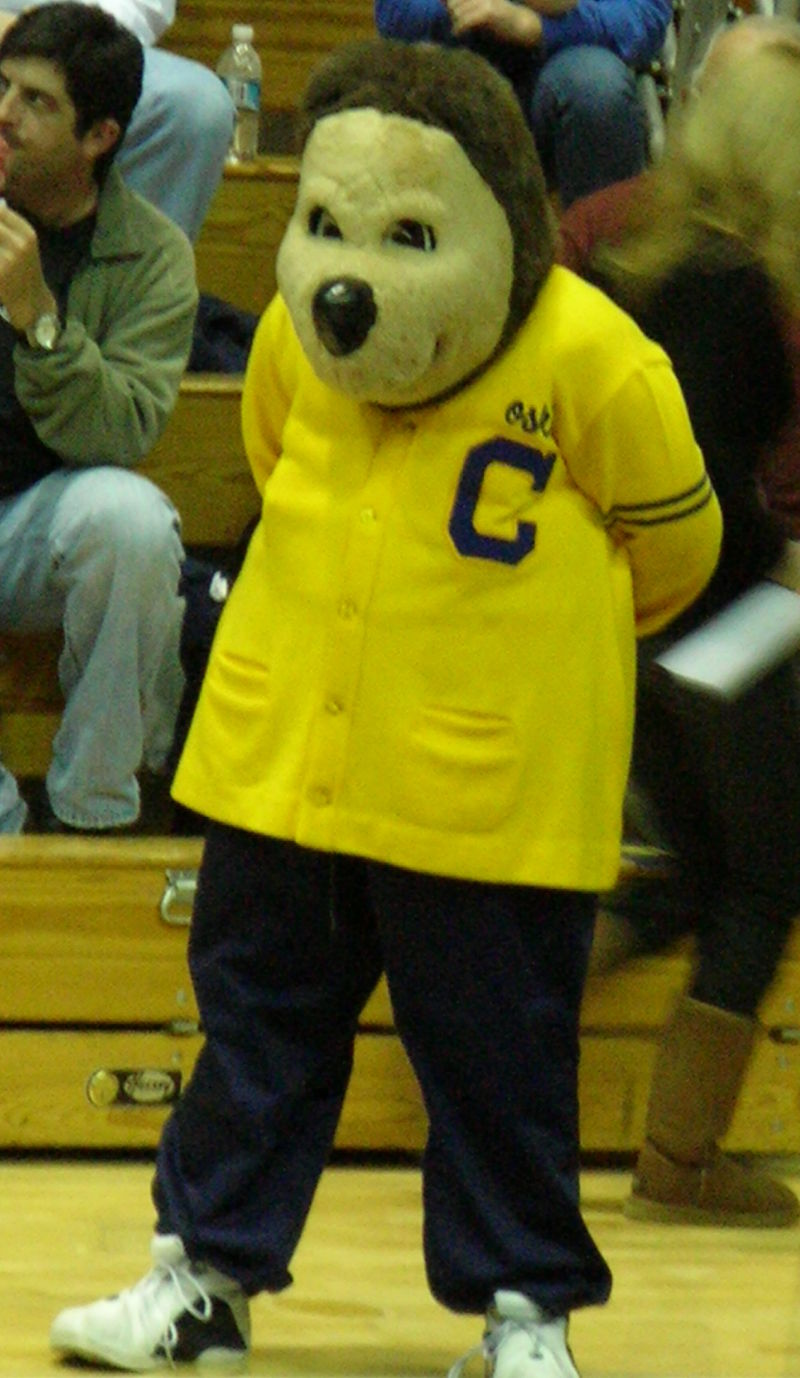

In [12]:
Image(filename = 'oski.JPG')

To make a map, we're going to be using the .create_map functionality built into the iDigBio API. This functionality is described [here](https://github.com/idigbio/idigbio-search-api/wiki#create-map).

Specify the rq by genus, here ursus. I want a heatmap, so specify t as "geohash". Don't worry if this looks confusing; I've linked websites to help build this code below. 

To view the map, I save it to the same folder my notebook is in and open it with Image. 

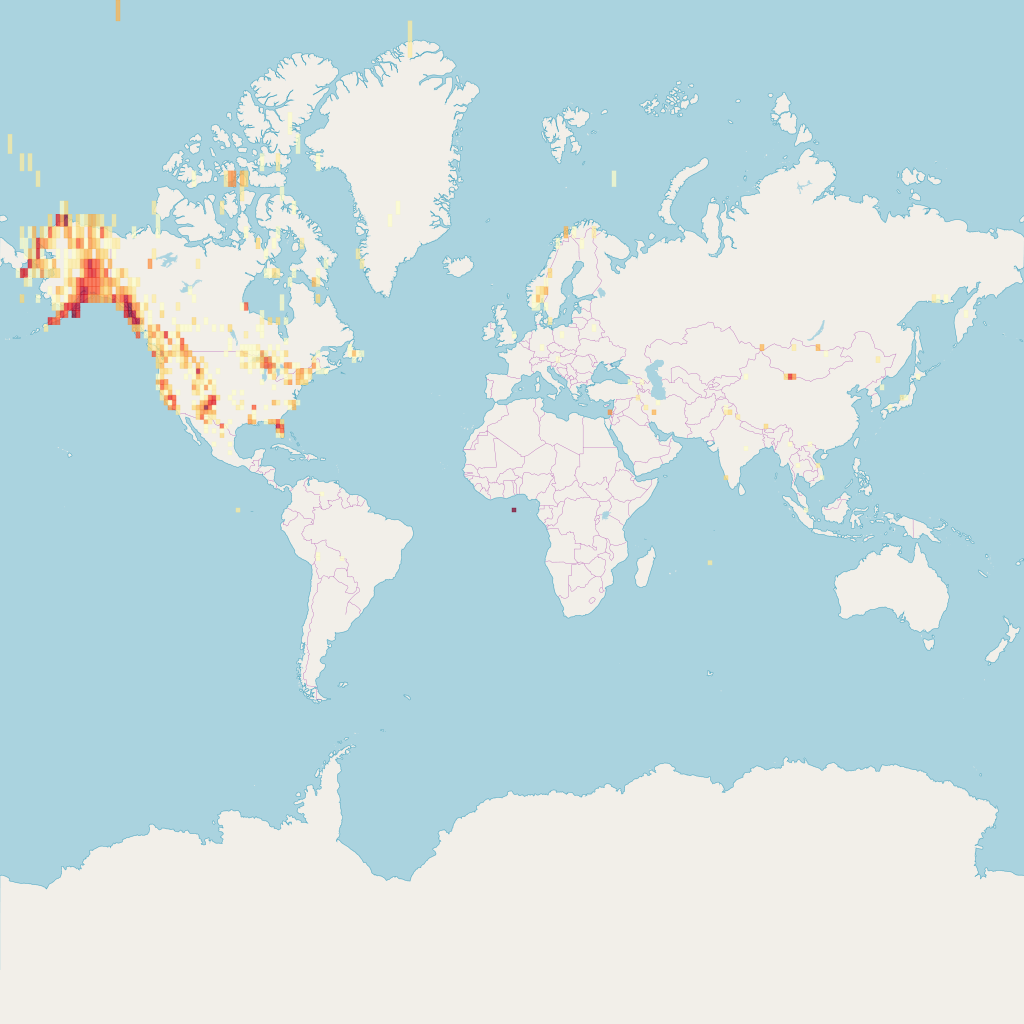

In [4]:
#Create a heatmap of results
m = api_json.create_map(rq={"genus": "ursus"}, t="geohash")
m.save_map_image("bear geohash", 2)
Image(filename = 'bear geohash.png')

I'm not sure exactly which projection this map is, but I believe it's Mercator. I'm also not sure how to find out; I looked at [this website](https://www.geolounge.com/types-map-projections/) and compared maps. 

Let's zoom in on this map...

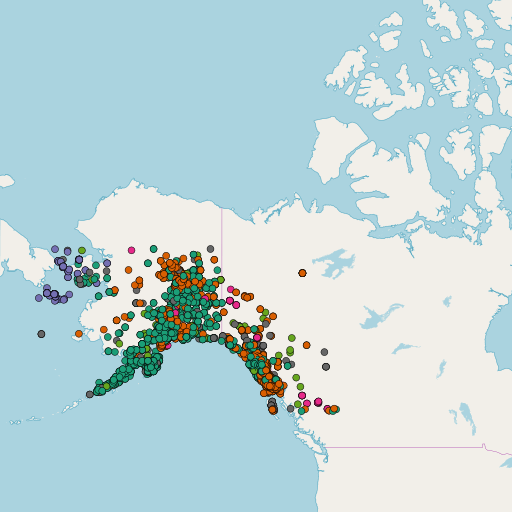

In [7]:
bbox = {"type": "geo_bounding_box", "bottom_right": {"lat": 53, "lon": -120}, "top_left": {"lat": 67, "lon": -176}}
m = api_json.create_map(
    rq={"genus": "ursus", "geopoint": bbox})

m.save_map_image("alaska.png", None, bbox=bbox)
Image(filename = "alaska.png.png")

(I used [this website](http://bboxfinder.com/) to find the coordinates for the box.)

Due to the differences in projections of the bbox finder and the map, you might want to play around with the coordinates until you get a box that fits.

I also don't know what the dot colors mean, and I'm not sure how to find out. I couldn't find anything helpful on the GitHub or in the API information. My best guess would be that it's seperation by institution. 

[This](https://github.com/idigbio/idigbio-search-api/wiki/Query-Format) website is great for building code, it's the API search query formats. [This one](https://github.com/idigbio/idigbio-search-api/wiki/Index-Fields) helps you write index queries.

Now I want to know about the distribution of specimens in the MVZ. 

Here is a map of all the specimens in iDigBio that are in the MVZ! All we have to do is specify institutioncode as MVZ.

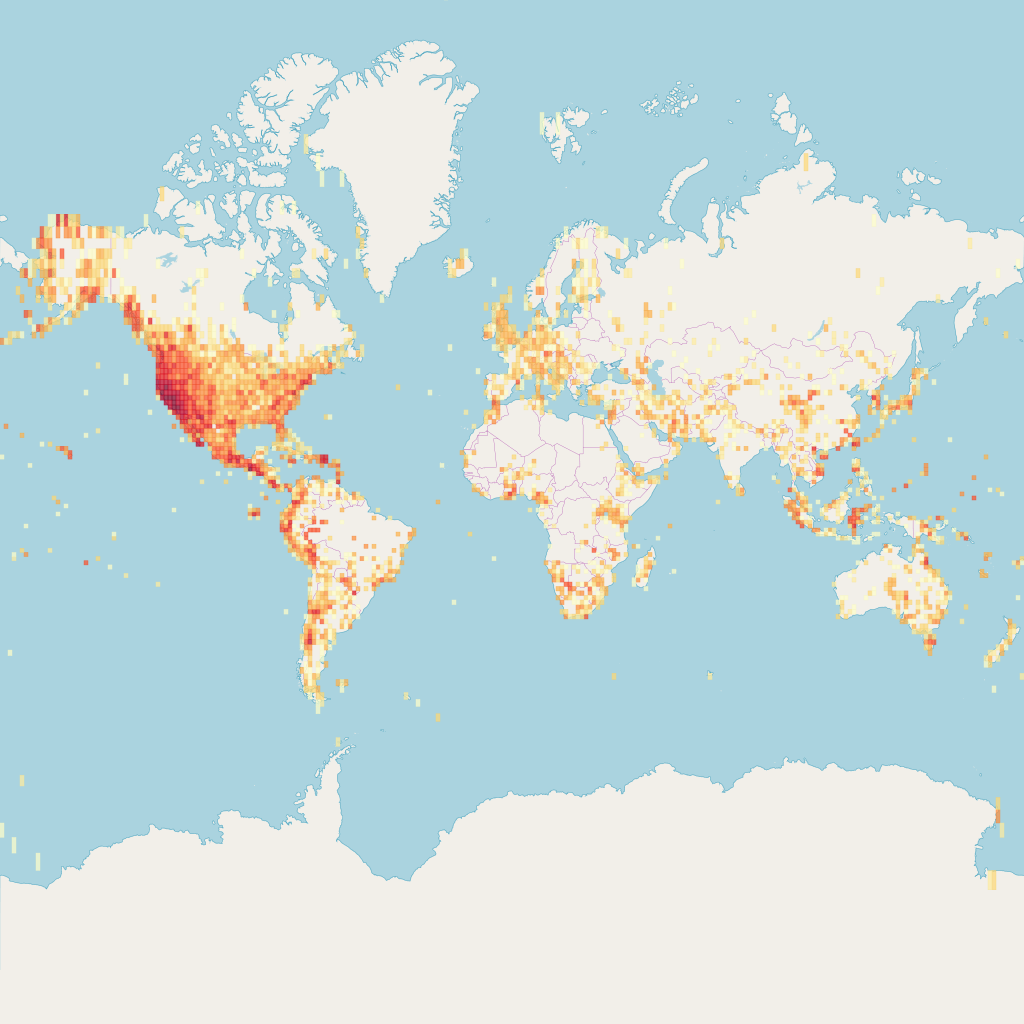

In [6]:
x = api_json.create_map(rq = {"institutioncode":"MVZ"})
x.save_map_image("mvz map", 2)
Image(filename = 'mvz map.png')